# https://github.com/HoangDucTrong19146285/VietNamFood.git

In [1]:
#Khởi tạo models 

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array

#import cv2  # import openCV
#cv2.__version__

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:

train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=40,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/food/train',
                        target_size=(150, 150),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/food/validation",
                         target_size=(150, 150),
                          batch_size=50,
                          
                         class_mode="categorical")
test_dataset = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/food/test",
                         target_size=(150, 150),
                          batch_size=50,
                          
                         class_mode="categorical")
#training_generator=np.array(training_generator)  # tạo mảng


Found 657 images belonging to 10 classes.
Found 158 images belonging to 10 classes.
Found 128 images belonging to 10 classes.


In [4]:
training_generator

In [5]:
training_generator.class_indices

{'bánh bao': 0,
 'bánh mì': 1,
 'bánh tét': 2,
 'bánh xèo': 3,
 'bắp nướng': 4,
 'bún đậu mắm tôm': 5,
 'gà bó xôi': 6,
 'gỏi cuốn': 7,
 'hủ tiếu': 8,
 'rau muống xào': 9}

In [6]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


##model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.1))



model.add(Flatten())
model.add(Dense(32,activation='relu',name='fc1'))

model.add(Dense(32,activation='relu',name='fc2'))

model.add(Dense(10,activation='softmax'))

#compiling the model..
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)
#from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#from tensorflow.keras.optimizers import Adam
#opt = Adam(learning_rate=0.001)
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history = model.fit(training_generator,batch_size=50,epochs=300,verbose=1,validation_data=validation_generator)


Epoch 1/300
14/14 [==============================] - 224s 15s/step - loss: 3.1736 - accuracy: 0.1126 - val_loss: 2.2921 - val_accuracy: 0.1139
Epoch 2/300
14/14 [==============================] - 6s 398ms/step - loss: 2.3041 - accuracy: 0.1050 - val_loss: 2.3000 - val_accuracy: 0.1013
Epoch 3/300
14/14 [==============================] - 5s 379ms/step - loss: 2.2943 - accuracy: 0.1050 - val_loss: 2.2939 - val_accuracy: 0.0759
Epoch 4/300
14/14 [==============================] - 5s 377ms/step - loss: 2.2751 - accuracy: 0.0959 - val_loss: 2.2749 - val_accuracy: 0.0949
Epoch 5/300
14/14 [==============================] - 5s 408ms/step - loss: 2.2516 - accuracy: 0.1096 - val_loss: 2.2745 - val_accuracy: 0.0380
Epoch 6/300
14/14 [==============================] - 5s 408ms/step - loss: 2.2381 - accuracy: 0.1020 - val_loss: 2.2633 - val_accuracy: 0.0443
Epoch 7/300
14/14 [==============================] - 5s 376ms/step - loss: 2.2172 - accuracy: 0.0913 - val_loss: 2.2569 - val_accuracy: 0.0696

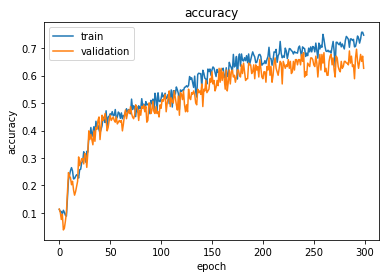

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [9]:
score=model.evaluate(test_dataset) 
print('Test loss = ',score[0])
print('Test acuracy',score[1])

3/3 [==============================] - 26s 13s/step - loss: 1.5883 - accuracy: 0.5625
Test loss =  1.5883204936981201
Test acuracy 0.5625


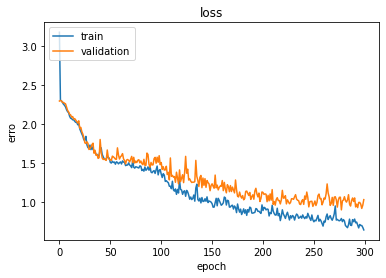

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('erro')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [11]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_food.h5')
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_food.h5')

In [12]:
names= ['bánh bao','bánh mì','bánh tét','bánh xèo','bắp nướng','bún đậu mắm tôm','gà bó xôi','gỏi cuốn','hủ tiếu','rau muống xào']

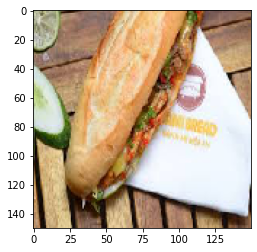

In [14]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('bánh mì 1.jpg',target_size=(150,150,3))
plt.imshow(img)

In [15]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
#val
print(names[np.argmax(model.predict(img))])

bánh mì


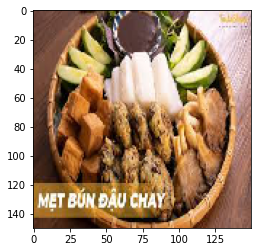

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('bundauchay.jpg',target_size=(150,150,3))
plt.imshow(img)

In [17]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
#val
print(names[np.argmax(model.predict(img))])

bún đậu mắm tôm


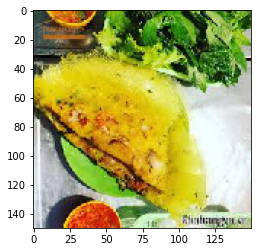

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('banhxeo1.jpg',target_size=(150,150,3))
plt.imshow(img)

In [19]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
#val
print(names[np.argmax(model.predict(img))])

bánh xèo


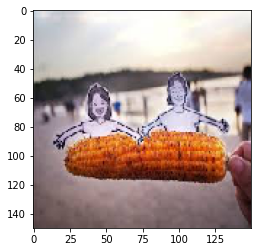

In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('bapnuong.jpg',target_size=(150,150,3))
plt.imshow(img)

In [21]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
#val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
#val
print(names[np.argmax(model.predict(img))])

bắp nướng
